In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [2]:
# splitting the data into features and target values
X, y = mnist["data"], mnist["target"]

In [3]:
# splitting the dataset to training (6/7) and test sets (1/7)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

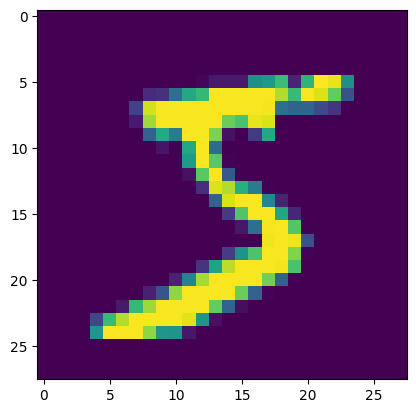

This is a 5


In [4]:
# displaying the first digit and its label value of the training set
plt.imshow(X_train[0].reshape((28,28)))
plt.show()
print(f"This is a {y_train[0]}")

In [5]:
# creating the 4 and not-4 target values
y_train_4 = (y_train == '4')
y_test_4 = (y_test == '4')

In [6]:
# training an SGD classifier 
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

In [7]:
# calculating the accuracy, recall and precision of the training set
from sklearn.model_selection import cross_validate
scores = cross_validate(sgd_clf, X_train, y_train_4, cv=3,
                        scoring=['accuracy', 'recall', 'precision'])

In [8]:
print(f"Accuracy of each fold: {scores['test_accuracy']}, mean accuracy: {100*scores['test_accuracy'].mean():.1f}%")
print(f"Recall of each fold: {scores['test_recall']}, mean recall: {100*scores['test_recall'].mean():.1f}%")
print(f"Precision of each fold: {scores['test_precision']}, mean precision: {100*scores['test_precision'].mean():.1f}%")

Accuracy of each fold: [0.9671  0.97645 0.9687 ], mean accuracy: 97.1%
Recall of each fold: [0.94350282 0.8366718  0.93531828], mean recall: 90.5%
Precision of each fold: [0.77023061 0.91414141 0.78466839], mean precision: 82.3%


In [9]:
non_4_accuracy = (y_train_4 == 0).sum()/len(y_train_4)
print (f"Accuracy of a model that always guesses not a 4: {100*non_4_accuracy:.1f}%")

Accuracy of a model that always guesses not a 4: 90.3%


The accuracy of the model that always guesses an image is not a 4 is 90.3%.</br>
This example demonstrates that when evaluating models, it's crucial to consider the balance of the dataset and be cautious when using accuracy as the sole metric.</br>

In [10]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[52957,  1201],
       [  554,  5288]], dtype=int64)

The confusion matrix shows that the model made 52,957 correct negative (TN) predictions, 1,201 false positive (FP) predictions, 554 false negative (FN) predictions, and 5,288 correct positive (TP) predictions.

In [12]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3, method="decision_function")

In [13]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_4, y_scores)

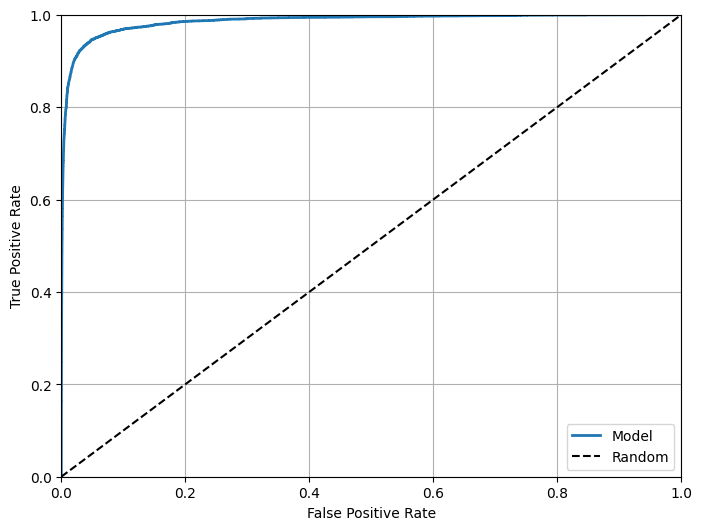

In [14]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))                  
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.axis([0, 1, 0, 1])              
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()

plot_roc_curve(fpr, tpr, "Model")

In [15]:
# calculating the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_4, y_scores)

0.9859276923382874

#### Comment:
Both the ROC and the area under the curve demonstrate that our model performs well on the training data.